Kenya’s goal is to reach 100% electricity connectivity by 2022. This is to enable a green economy run by 100% sustainable energy in terms of electricity generation and consumption. Additionally, in accordance with the Paris Agreement, Kenya committed itself to tackling climate change. The country’s determined contribution (National Determined Contribution), which is pegged on the 2013 Kenya Climate Change Action Plan, promises to reduce greenhouse gas (GHG) emissions by 30% by 2030 from 2015 (Ministry
of Environment and Natural Resources 2015).

The goal of this project is to determine what the current consumption of electricity is, type of energy source and how does it compare over the duration of the data and the Vision 2030 goals?

# DATA PREPARATION

In [1]:
# Loading libraries into our environment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the datasets into the environment

Energy_2020 = pd.read_csv('Energy_Main_Lighting_Energy_Sources.csv')
Energy_2017 = pd.read_csv('Main_Lighting_Energy_Sources_averaged_to_Districts_in_2009.csv')

In [3]:
# Previewing Energy 2020
Energy_2020.head()

,OBJECTID,County,Electricty_percentage,Pressure_Lamp_percentage,Lantern_percentage,Tin_Lamp_percebntage,Gas_Lamp_percentage,Fuel_wood_percentage,Solar_percentage,Other_Lighting_percentage,Number_of_households_with_electricity,Number_of_households_with_Pressure_Lamp,Number_of_households_with_Lantern,Number_of_households_with_Tin_Lamp,Number_of_households_with_Gas_Lamp,Number_of_households_with_Fuel_wood,Number_of_households_with_Solar,Number_of_households_with_Other,Households,Shape_Length,Shape_Area
0,1,BARINGO,10,0,39,20,1,2,28,0,10583,437,43488,22238,796,1902,30734,471,110649,6.333111,0.888242
1,2,BOMET,4,0,65,26,1,3,1,0,7552,581,113311,45434,1135,4958,1444,499,174914,2.101561,0.116672
2,3,BUNGOMA,5,1,27,67,1,0,1,0,12219,1351,72256,180120,1704,1223,1493,458,270824,3.173881,0.244750
3,4,BUSIA,6,0,22,71,0,0,0,0,9253,494,33283,108949,709,633,566,338,154225,3.009087,0.136848
4,5,EMBU,7,0,47,28,1,1,15,0,5547,220,36321,21891,449,1155,11744,228,77555,3.373973,0.227949


In [4]:
# Previewing Energy 2017
Energy_2017.head()

,_District,Rural_/_Urban,%_of_households_with_electricty,%_of_households_with_Pressure_Lamp,%_of_households_with_Lantern,%_of_households_with_Tin_Lamp,%_of_households_with_Gas_Lamp,%_of_households_with_Fuel_wood,%_of_households_with_Solar,%_of_households_with_Other,Housheolds,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,Province,County,Census_Table,MTEF,MTP,Longtitude,Latitude,Geolocation,OBJECTID
0,MERU CENTRAL,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,EASTERN,Meru,Table 10b: Urban Households by main type of Li...,Physical Infrastructure,Energy,37.583307,0.001444,"(0.001443681, 37.58330732)",0
1,KAKAMEGA SOUTH,Urban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,WESTERN,Kakamega,Table 10a: Rural Households by main type of Li...,Physical Infrastructure,Energy,34.707748,0.190562,"(0.190561619, 34.7077479)",1
2,NYANDARUA NORTH,Urban,6.3%,0.6%,51.6%,32.1%,0.8%,0.4%,7.9%,0.2%,52503,3332,302,27102,16865,395,214,4173,120,CENTRAL,Nyandarua,Table 10b: Urban Households by main type of Li...,Physical Infrastructure,Energy,36.423431,-0.144561,"(-0.144560572, 36.42343108)",2
3,NYANDARUA SOUTH,Urban,6%,0.6%,62.8%,24.3%,0.6%,0.2%,5.3%,0.1%,61936,3741,387,38900,15077,384,103,3256,88,CENTRAL,Nyandarua,Table 10b: Urban Households by main type of Li...,Physical Infrastructure,Energy,36.556513,-0.533045,"(-0.533045224, 36.55651343)",3
4,NYERI NORTH,Urban,14.5%,1%,41.4%,34.3%,0.6%,0.8%,7.2%,0.2%,81307,11774,775,33686,27884,514,651,5868,155,CENTRAL,Nyeri,Table 10b: Urban Households by main type of Li...,Physical Infrastructure,Energy,36.981144,-0.266587,"(-0.266587082, 36.9811441)",4


In [5]:
# Understanding the information contained in Energy 2020 columns
Energy_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   OBJECTID                                 47 non-null     int64  
 1   County                                   47 non-null     object 
 2   Electricty_percentage                    47 non-null     int64  
 3   Pressure_Lamp_percentage                 47 non-null     int64  
 4   Lantern_percentage                       47 non-null     int64  
 5   Tin_Lamp_percebntage                     47 non-null     int64  
 6   Gas_Lamp_percentage                      47 non-null     int64  
 7   Fuel_wood_percentage                     47 non-null     int64  
 8   Solar_percentage                         47 non-null     int64  
 9   Other_Lighting_percentage                47 non-null     int64  
 10  Number_of_households_with_electricity    47 non-null

In [6]:
# Understanding the information contained in Energy 2017 columns
Energy_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _District                            316 non-null    object 
 1   Rural_/_Urban                        316 non-null    object 
 2   %_of_households_with_electricty      290 non-null    object 
 3   %_of_households_with_Pressure_Lamp   290 non-null    object 
 4   %_of_households_with_Lantern         290 non-null    object 
 5   %_of_households_with_Tin_Lamp        290 non-null    object 
 6   %_of_households_with_Gas_Lamp        290 non-null    object 
 7   %_of_households_with_Fuel_wood       290 non-null    object 
 8   %_of_households_with_Solar           290 non-null    object 
 9   %_of_households_with_Other           290 non-null    object 
 10  Housheolds                           316 non-null    int64  
 11  No_of_households_with_electricit

In [7]:
# Dropping unrequired fields from Energy 2020

Energy_2020.drop(['Electricty_percentage', 'Pressure_Lamp_percentage', 'Lantern_percentage', 'Tin_Lamp_percebntage', 'Gas_Lamp_percentage', 'Fuel_wood_percentage', 'Solar_percentage', 'Other_Lighting_percentage'], axis= 1, inplace= True)
Energy_2020.drop(['OBJECTID','Shape_Length', 'Shape_Area'], axis= 1, inplace= True)

In [8]:
# Dropping unrequired fields from Energy 2017
Energy_2017.drop(['%_of_households_with_electricty', '%_of_households_with_Pressure_Lamp', '%_of_households_with_Lantern', '%_of_households_with_Tin_Lamp', '%_of_households_with_Gas_Lamp', '%_of_households_with_Fuel_wood'], axis= 1, inplace= True)
Energy_2017.drop(['%_of_households_with_Solar', '%_of_households_with_Other', 'Province', 'Census_Table', 'MTEF', 'MTP', 'Longtitude', 'Latitude', 'Geolocation', 'OBJECTID'], axis= 1, inplace= True)

In [9]:
# Viewing the new table Energy 2020
Energy_2020.head()

,County,Number_of_households_with_electricity,Number_of_households_with_Pressure_Lamp,Number_of_households_with_Lantern,Number_of_households_with_Tin_Lamp,Number_of_households_with_Gas_Lamp,Number_of_households_with_Fuel_wood,Number_of_households_with_Solar,Number_of_households_with_Other,Households
0,BARINGO,10583,437,43488,22238,796,1902,30734,471,110649
1,BOMET,7552,581,113311,45434,1135,4958,1444,499,174914
2,BUNGOMA,12219,1351,72256,180120,1704,1223,1493,458,270824
3,BUSIA,9253,494,33283,108949,709,633,566,338,154225
4,EMBU,5547,220,36321,21891,449,1155,11744,228,77555


In [10]:
# Viewing the new table Energy 2017
Energy_2017.head()

,_District,Rural_/_Urban,Housheolds,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County
0,MERU CENTRAL,Urban,0,0,0,0,0,0,0,0,0,Meru
1,KAKAMEGA SOUTH,Urban,0,0,0,0,0,0,0,0,0,Kakamega
2,NYANDARUA NORTH,Urban,52503,3332,302,27102,16865,395,214,4173,120,Nyandarua
3,NYANDARUA SOUTH,Urban,61936,3741,387,38900,15077,384,103,3256,88,Nyandarua
4,NYERI NORTH,Urban,81307,11774,775,33686,27884,514,651,5868,155,Nyeri


In [11]:
# Making the data consistent
Energy_2020.columns = Energy_2020.columns.str.replace('Number','No')
Energy_2017.drop('Rural_/_Urban', axis= 1, inplace= True)

In [12]:
# Prepared Table for Energy 2020
Energy_2020.head()

,County,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,Households
0,BARINGO,10583,437,43488,22238,796,1902,30734,471,110649
1,BOMET,7552,581,113311,45434,1135,4958,1444,499,174914
2,BUNGOMA,12219,1351,72256,180120,1704,1223,1493,458,270824
3,BUSIA,9253,494,33283,108949,709,633,566,338,154225
4,EMBU,5547,220,36321,21891,449,1155,11744,228,77555


In [13]:
# Prepared Table for Energy 2017
Energy_2017.head()

,_District,Housheolds,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County
0,MERU CENTRAL,0,0,0,0,0,0,0,0,0,Meru
1,KAKAMEGA SOUTH,0,0,0,0,0,0,0,0,0,Kakamega
2,NYANDARUA NORTH,52503,3332,302,27102,16865,395,214,4173,120,Nyandarua
3,NYANDARUA SOUTH,61936,3741,387,38900,15077,384,103,3256,88,Nyandarua
4,NYERI NORTH,81307,11774,775,33686,27884,514,651,5868,155,Nyeri


# DATA CLEANING

## Validity of the data

In [14]:
#2017 dataset column name rectification
Energy_2017.rename(columns= {'Housheolds': 'Households'}, inplace = True)
Energy_2017.head(2)

,_District,Households,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County
0,MERU CENTRAL,0,0,0,0,0,0,0,0,0,Meru
1,KAKAMEGA SOUTH,0,0,0,0,0,0,0,0,0,Kakamega


In [15]:
#Using the str.strip function on the column name to strip any leading and trailing spaces  
Energy_2017['County'] = Energy_2017['County'].str.strip()
Energy_2020['County'] = Energy_2020['County'].str.strip()

# Displaying the resulting dataframe
Energy_2017.head(4)
Energy_2020.head(2)

#checking for errors/anomalies in records
Energy_2017['County'].unique()
Energy_2020['County'].unique()


array(['BARINGO', 'BOMET', 'BUNGOMA', 'BUSIA', 'EMBU', 'GARISSA',
       'HOMABAY', 'ISIOLO', 'KAJIADO', 'KAKAMEGA', 'ELGEYO-MARAKWET',
       'KERICHO', 'KIAMBU', 'KILIFI', 'KIRINYAGA', 'KISII', 'KISUMU',
       'KITUI', 'KWALE', 'LAIKIPIA', 'LAMU', 'MACHAKOS', 'MAKUENI',
       'MANDERA', 'MARSABIT', 'MERU', 'MIGORI', 'MOMBASA', 'MURANGA',
       'NAIROBI', 'NAKURU', 'NANDI', 'NAROK', 'NYAMIRA', 'NYANDARUA',
       'NYERI', 'SAMBURU', 'SIAYA', 'TAITA-TAVETA', 'TANA-RIVER',
       'THARAKA-NITHI', 'TRANS-NZOIA', 'TURKANA', 'UASIN-GISHU', 'VIHIGA',
       'WAJIR', 'WEST POKOT'], dtype=object)

In [16]:
#Using str.replace() function on the respective 2017 column to remove the apostrophe Murang'a 
# 

Energy_2017['County'] = Energy_2017['County'].str.replace("'","")

# Displaying the resulting dataframe
Energy_2017['County'].unique()

array(['Meru', 'Kakamega', 'Nyandarua', 'Nyeri', 'Kirinyaga', 'Muranga',
       'Kiambu', 'Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu',
       'Taita Taveta', 'Marsabit', 'Isiolo', 'Tharaka Nithi', 'Embu',
       'Kitui', 'Machakos', 'West Pokot', 'Makueni', 'Nairobi', 'Garissa',
       'Wajir', 'Mandera', 'Siaya', 'Kisumu', 'Homa Bay', 'Migori',
       'Kisii', 'Nyamira', 'Turkana', 'Samburu', 'Trans Nzoia', 'Baringo',
       'Uasin Gishu', 'Elgeyo Marakwet', 'Nandi', 'Laikipia', 'Nakuru',
       'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Vihiga', 'Bungoma',
       'Busia'], dtype=object)

In [17]:
#Using str.replace() function on the respective 2020 column to remove the hyphens 
# 

Energy_2020['County'] = Energy_2020['County'].str.replace("-"," ")

# Displaying the resulting dataframe
Energy_2020['County'].unique()

array(['BARINGO', 'BOMET', 'BUNGOMA', 'BUSIA', 'EMBU', 'GARISSA',
       'HOMABAY', 'ISIOLO', 'KAJIADO', 'KAKAMEGA', 'ELGEYO MARAKWET',
       'KERICHO', 'KIAMBU', 'KILIFI', 'KIRINYAGA', 'KISII', 'KISUMU',
       'KITUI', 'KWALE', 'LAIKIPIA', 'LAMU', 'MACHAKOS', 'MAKUENI',
       'MANDERA', 'MARSABIT', 'MERU', 'MIGORI', 'MOMBASA', 'MURANGA',
       'NAIROBI', 'NAKURU', 'NANDI', 'NAROK', 'NYAMIRA', 'NYANDARUA',
       'NYERI', 'SAMBURU', 'SIAYA', 'TAITA TAVETA', 'TANA RIVER',
       'THARAKA NITHI', 'TRANS NZOIA', 'TURKANA', 'UASIN GISHU', 'VIHIGA',
       'WAJIR', 'WEST POKOT'], dtype=object)

## Accuracy of the data

In [18]:
Energy_2017.head(1)

,_District,Households,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County
0,MERU CENTRAL,0,0,0,0,0,0,0,0,0,Meru


In [19]:
# In-record & cross-datasets error checks
#2017 dataset accuracy check
e = Energy_2017['No_of_households_with_electricity'] + Energy_2017['No_of_households_with_Pressure_Lamp'] +Energy_2017['No_of_households_with_Lantern'] + Energy_2017['No_of_households_with_Tin_Lamp'] + Energy_2017['No_of_households_with_Gas_Lamp'] + Energy_2017['No_of_households_with_Fuel_wood'] + Energy_2017['No_of_households_with_Solar'] + Energy_2017['No_of_households_with_Other']
Energy_2017[Energy_2017['Households'] != e]

,_District,Households,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County


In [20]:
# In-record & cross-datasets error checks
#2020 dataset accuracy check
e1 = Energy_2020['No_of_households_with_electricity'] + Energy_2020['No_of_households_with_Pressure_Lamp'] +Energy_2020['No_of_households_with_Lantern'] + Energy_2020['No_of_households_with_Tin_Lamp'] + Energy_2020['No_of_households_with_Gas_Lamp'] + Energy_2020['No_of_households_with_Fuel_wood'] + Energy_2020['No_of_households_with_Solar'] + Energy_2020['No_of_households_with_Other']
Energy_2020[Energy_2020['Households'] != e1]

,County,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,Households


## Completeness of the data

In [21]:
# Checking if there is any missing value in 2017 dataset as a whole
Energy_2017.isnull().any()

# Checking if there is any missing value in 2020 dataset as a whole
Energy_2020.isnull().any()


# Checking if there is any missing value across each column and if so how many
# 2017 dataset
Energy_2017.isnull().sum()
# 2020 dataset
Energy_2020.isnull().sum()

County                                 0
No_of_households_with_electricity      0
No_of_households_with_Pressure_Lamp    0
No_of_households_with_Lantern          0
No_of_households_with_Tin_Lamp         0
No_of_households_with_Gas_Lamp         0
No_of_households_with_Fuel_wood        0
No_of_households_with_Solar            0
No_of_households_with_Other            0
Households                             0
dtype: int64

## Consistency of the data

In [22]:
Energy_2017.head(1)

,_District,Households,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,County
0,MERU CENTRAL,0,0,0,0,0,0,0,0,0,Meru


In [23]:
#Checking for duplicates
#2017 dataset (used households since some district names were duplicated but not the records)
Energy_2017[Energy_2017['Households'].duplicated() ==True]
#Rachuonyo was ignored because its household numbers different values
#Energy_2017[Energy_2017.duplicated(['_District'])==True].sort_values('_District')

#2020 dataset
Energy_2020[Energy_2020['County'].duplicated() ==True]


,County,No_of_households_with_electricity,No_of_households_with_Pressure_Lamp,No_of_households_with_Lantern,No_of_households_with_Tin_Lamp,No_of_households_with_Gas_Lamp,No_of_households_with_Fuel_wood,No_of_households_with_Solar,No_of_households_with_Other,Households


## Uniformity of the data

In [24]:
#Standardization of column names
#Using strip(), lower() and replace() functions 
#2017 dataset
Energy_2017.columns = Energy_2017.columns.str.strip().str.lower()
Energy_2017.head(1)

#2020 dataset
Energy_2020.columns = Energy_2020.columns.str.strip().str.lower()
Energy_2020.head(1)


,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households
0,BARINGO,10583,437,43488,22238,796,1902,30734,471,110649


In [25]:
#checking data types
#2017 dataset
Energy_2017.info()

#2020 dataset
Energy_2020.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   _district                            316 non-null    object
 1   households                           316 non-null    int64 
 2   no_of_households_with_electricity    316 non-null    int64 
 3   no_of_households_with_pressure_lamp  316 non-null    int64 
 4   no_of_households_with_lantern        316 non-null    int64 
 5   no_of_households_with_tin_lamp       316 non-null    int64 
 6   no_of_households_with_gas_lamp       316 non-null    int64 
 7   no_of_households_with_fuel_wood      316 non-null    int64 
 8   no_of_households_with_solar          316 non-null    int64 
 9   no_of_households_with_other          316 non-null    int64 
 10  county                               316 non-null    object
dtypes: int64(9), object(2)
memory usage: 27.3+ KB

In [26]:
#2017 dataset group by to create a dataset of counties only like the 2020 datset
#Energy1_2017 = Energy_2017.groupby(['no_of_households_with_electricity', 'no_of_households_with_pressure_lamp', 'no_of_households_with_lantern', 'no_of_households_with_tin_lamp', 'no_of_households_with_gas_lamp', 'no_of_households_with_fuel_wood', 'no_of_households_with_solar','no_of_households_with_other'])['county'].sum().reset_index()
Energy1_2017 = Energy_2017.groupby(['county'])['no_of_households_with_electricity', 'no_of_households_with_pressure_lamp', 'no_of_households_with_lantern', 'no_of_households_with_tin_lamp', 'no_of_households_with_gas_lamp', 'no_of_households_with_fuel_wood', 'no_of_households_with_solar','no_of_households_with_other', 'households'].sum().reset_index()
Energy1_2017
#g1 = df1.groupby( [ "Name", "City"] ).count().reset_index()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households
0,Baringo,10583,437,43488,22238,796,30734,1902,471,110649
1,Bomet,7552,581,113311,45434,1135,1444,4958,499,174914
2,Bungoma,12219,1351,72256,180120,1704,1493,1223,458,270824
3,Busia,9253,494,33283,108949,709,566,633,338,154225
4,Elgeyo Marakwet,5547,220,36321,21891,449,11744,1155,228,77555
5,Embu,19611,992,46512,57535,778,1114,4515,626,131683
6,Garissa,11405,552,20272,31642,17277,10251,364,6827,98590
7,Homa Bay,6850,980,43788,150440,1067,823,2081,226,206255
8,Isiolo,5800,154,9751,6113,781,7283,429,1015,31326
9,Kajiado,69098,1430,32788,62031,706,3804,1827,1780,173464


In [27]:
#overall % elect
(Energy_2020['no_of_households_with_electricity'] +Energy_2020['no_of_households_with_solar']).sum()/Energy_2020['households'].sum()

0.27210475784886645

Having carried out the above steps, it was observed that the two datasets were in fact the same original dataset based on 2011 data that had undergone cleaning. Additional research and data sourcing was carried out and the result was the adoption of the following data into our analysis


# DATA PREPARATION 2


In [28]:
# Energy data from 2009
Energy_2009 = pd.read_csv('kenya-access-to-electricity-rates-per-county.csv')
Energy_2009.head()

,Country,Counties,Access to electricity
0,Kenya,National Average,23.0
1,Kenya,Baringo,9.6
2,Kenya,Bomet,4.3
3,Kenya,Bungoma,4.5
4,Kenya,Busia,6.0


In [29]:
# Making the above consistent with the previous data
Energy_2009.rename(columns= {'Counties': 'County', 'Access to electricity': 'percent_access_to_electricity' }, inplace = True)
Energy_2009.columns = Energy_2009.columns.str.strip().str.lower()
copy_2009 = Energy_2009.copy(deep=True)
Energy_2009.head()

,country,county,percent_access_to_electricity
0,Kenya,National Average,23.0
1,Kenya,Baringo,9.6
2,Kenya,Bomet,4.3
3,Kenya,Bungoma,4.5
4,Kenya,Busia,6.0


In [30]:
# Loading the world bank datasets into the environment

Source = pd.read_csv('share-elec-by-source.csv')
Fossil_Fuels = pd.read_csv('share-electricity-fossil-fuels.csv')
Carbon = pd.read_csv('share-electricity-low-carbon.csv')
Renewables = pd.read_csv('share-electricity-renewables.csv')
Electricity_access = pd.read_csv('share-of-the-population-with-access-to-electricity.csv')

In [31]:
# Previewing the datasets above
Source.head()

,Entity,Code,Year,Coal (% electricity),Oil (% electricity),Gas (% electricity),Nuclear (% electricity),Solar (% electricity),Wind (% electricity),Hydro (% electricity),Other renewables (% electricity)
0,Afghanistan,AFG,2000,0.0,0.0,33.190578,0.0,0.0,0.0,66.809422,0.0
1,Afghanistan,AFG,2001,0.0,0.0,15.878378,0.0,0.0,0.0,84.121622,0.0
2,Afghanistan,AFG,2002,0.0,0.0,19.213974,0.0,0.0,0.0,80.786026,0.0
3,Afghanistan,AFG,2003,0.0,0.0,32.907348,0.0,0.0,0.0,67.092652,0.0
4,Afghanistan,AFG,2004,0.0,0.0,36.800895,0.0,0.0,0.0,63.199105,0.0


In [32]:
Fossil_Fuels.head()

,Entity,Code,Year,Fossil fuels (% electricity)
0,Afghanistan,AFG,2000,33.190578
1,Afghanistan,AFG,2001,15.878378
2,Afghanistan,AFG,2002,19.213974
3,Afghanistan,AFG,2003,32.907348
4,Afghanistan,AFG,2004,36.800895


In [33]:
Carbon.head()

,Entity,Code,Year,Low-carbon electricity (% electricity)
0,Afghanistan,AFG,2000,66.809422
1,Afghanistan,AFG,2001,84.121622
2,Afghanistan,AFG,2002,80.786026
3,Afghanistan,AFG,2003,67.092652
4,Afghanistan,AFG,2004,63.199105


In [34]:
Renewables.head()

,Entity,Code,Year,Renewables (% electricity)
0,Afghanistan,AFG,2000,66.809422
1,Afghanistan,AFG,2001,84.121622
2,Afghanistan,AFG,2002,80.786026
3,Afghanistan,AFG,2003,67.092652
4,Afghanistan,AFG,2004,63.199105


In [35]:
Electricity_access.head()

,Entity,Code,Year,Access to electricity (% of population)
0,Afghanistan,AFG,1990,0.01
1,Afghanistan,AFG,1991,0.01
2,Afghanistan,AFG,1992,0.01
3,Afghanistan,AFG,1993,0.01
4,Afghanistan,AFG,1994,0.01


In [36]:
# All data sets have values from 2000 that include all countries in the world.
# We'll need to access only data relative to Kenya
Source = Source[Source.Entity == 'Kenya']
Fossil_Fuels = Fossil_Fuels[Fossil_Fuels.Entity == 'Kenya']
Carbon = Carbon[Carbon.Entity == 'Kenya']
Renewables = Renewables[Renewables.Entity == 'Kenya']
Electricity_access = Electricity_access[Electricity_access.Entity == 'Kenya']

In [37]:
# We'll also drop the irrelevant column Code
Source.drop('Code', axis= 1, inplace=True)
Fossil_Fuels.drop('Code', axis= 1, inplace=True)
Carbon.drop('Code', axis= 1, inplace= True)
Renewables.drop('Code', axis= 1, inplace= True)
Electricity_access.drop('Code', axis= 1, inplace=True)

In [38]:
# Previewing the data
Source.head()

,Entity,Year,Coal (% electricity),Oil (% electricity),Gas (% electricity),Nuclear (% electricity),Solar (% electricity),Wind (% electricity),Hydro (% electricity),Other renewables (% electricity)
2600,Kenya,2000,0.0,49.259990,0.0,0.0,0.0,0.0,32.363098,18.376912
2601,Kenya,2001,0.0,30.873068,0.0,0.0,0.0,0.0,51.796212,17.330721
2602,Kenya,2002,0.0,20.244108,0.0,0.0,0.0,0.0,64.983165,14.772727
2603,Kenya,2003,0.0,15.064731,0.0,0.0,0.0,0.0,63.299333,21.635936
2604,Kenya,2004,0.0,23.143224,0.0,0.0,0.0,0.0,52.081423,24.775353


In [39]:
Fossil_Fuels.head()

,Entity,Year,Fossil fuels (% electricity)
2245,Kenya,2000,49.259990
2246,Kenya,2001,30.873068
2247,Kenya,2002,20.244108
2248,Kenya,2003,15.064731
2249,Kenya,2004,23.143224


In [40]:
Carbon.head()

,Entity,Year,Low-carbon electricity (% electricity)
2600,Kenya,2000,50.740010
2601,Kenya,2001,69.126932
2602,Kenya,2002,79.755892
2603,Kenya,2003,84.935269
2604,Kenya,2004,76.856776


In [41]:
Renewables.head()

,Entity,Year,Renewables (% electricity)
2600,Kenya,2000,50.740010
2601,Kenya,2001,69.126932
2602,Kenya,2002,79.755892
2603,Kenya,2003,84.935269
2604,Kenya,2004,76.856776


In [42]:
Electricity_access.head()

,Entity,Year,Access to electricity (% of population)
3159,Kenya,1990,3.318390
3160,Kenya,1991,4.614890
3161,Kenya,1992,5.910881
3162,Kenya,1993,10.900000
3163,Kenya,1994,8.490625


In [43]:
# Consistency in columns
Source.columns = ['Entity', 'Year', 'Coal_percent_of_electricity', 'Oil_percent_of_electricity', 'Gas_percent_of_electricity', 'Nuclear_percent_of_electricity', 'Solar_percent_of_electricity',
                  'Wind_percent_of_electricity', 'Hydro_percent_of_electricity', 'Other_renewables_percent_of_electricity']
Fossil_Fuels.columns = ['Entity', 'Year', 'Fossil_Fuels_percent_of_electricity']
Carbon.columns = ['Entity', 'Year', 'Low_carbon_percent_of_electricity']
Renewables.columns = ['Entity', 'Year', 'Renewables_percent_of_electricity']
Electricity_access.columns = ['Entity', 'Year', 'percent_access_to_electricity']

# DATA CLEANING 2

In [44]:
#dropping average row from Energy dataset
Energy_2009.drop([0], axis=0, inplace=True)
Energy_2009.head(3)


,country,county,percent_access_to_electricity
1,Kenya,Baringo,9.6
2,Kenya,Bomet,4.3
3,Kenya,Bungoma,4.5


In [45]:
#checking for null values
Energy_2009.isnull().sum()

country                          1
county                           1
percent_access_to_electricity    1
dtype: int64

In [46]:
#dropping null values
Energy_2009.dropna(inplace=True)
Energy_2009.isnull().sum()

country                          0
county                           0
percent_access_to_electricity    0
dtype: int64

In [47]:
#reseting the index
Energy_2009 = Energy_2009.reset_index()
Energy_2009.head(3)


,index,country,county,percent_access_to_electricity
0,1,Kenya,Baringo,9.6
1,2,Kenya,Bomet,4.3
2,3,Kenya,Bungoma,4.5


In [48]:
#drop extra index column
Energy_2009.drop(['index'], axis=1, inplace=True)
Energy_2009.head()

,country,county,percent_access_to_electricity
0,Kenya,Baringo,9.6
1,Kenya,Bomet,4.3
2,Kenya,Bungoma,4.5
3,Kenya,Busia,6.0
4,Kenya,Elgeiyo-Marakwet,7.2


In [49]:
#dropping fossil table as it's the same as the Oil % column in Source table.
#dropping Carbon table as it's the same as the renewables table.
#Appending renewables to the Sources column.

Source['percent_total_renewables'] = Renewables['Renewables_percent_of_electricity']
Source.head()

,Entity,Year,Coal_percent_of_electricity,Oil_percent_of_electricity,Gas_percent_of_electricity,Nuclear_percent_of_electricity,Solar_percent_of_electricity,Wind_percent_of_electricity,Hydro_percent_of_electricity,Other_renewables_percent_of_electricity,percent_total_renewables
2600,Kenya,2000,0.0,49.259990,0.0,0.0,0.0,0.0,32.363098,18.376912,50.740010
2601,Kenya,2001,0.0,30.873068,0.0,0.0,0.0,0.0,51.796212,17.330721,69.126932
2602,Kenya,2002,0.0,20.244108,0.0,0.0,0.0,0.0,64.983165,14.772727,79.755892
2603,Kenya,2003,0.0,15.064731,0.0,0.0,0.0,0.0,63.299333,21.635936,84.935269
2604,Kenya,2004,0.0,23.143224,0.0,0.0,0.0,0.0,52.081423,24.775353,76.856776


In [50]:
#Standardization of column names
#Using strip(), lower() and replace() functions 
#Source table
Source.columns = Source.columns.str.strip().str.lower()
Source.head(1)


,entity,year,coal_percent_of_electricity,oil_percent_of_electricity,gas_percent_of_electricity,nuclear_percent_of_electricity,solar_percent_of_electricity,wind_percent_of_electricity,hydro_percent_of_electricity,other_renewables_percent_of_electricity,percent_total_renewables
2600,Kenya,2000,0.0,49.25999,0.0,0.0,0.0,0.0,32.363098,18.376912,50.74001


In [51]:
#reseting the index column
Source = Source.reset_index()
Source.head()

,index,entity,year,coal_percent_of_electricity,oil_percent_of_electricity,gas_percent_of_electricity,nuclear_percent_of_electricity,solar_percent_of_electricity,wind_percent_of_electricity,hydro_percent_of_electricity,other_renewables_percent_of_electricity,percent_total_renewables
0,2600,Kenya,2000,0.0,49.259990,0.0,0.0,0.0,0.0,32.363098,18.376912,50.740010
1,2601,Kenya,2001,0.0,30.873068,0.0,0.0,0.0,0.0,51.796212,17.330721,69.126932
2,2602,Kenya,2002,0.0,20.244108,0.0,0.0,0.0,0.0,64.983165,14.772727,79.755892
3,2603,Kenya,2003,0.0,15.064731,0.0,0.0,0.0,0.0,63.299333,21.635936,84.935269
4,2604,Kenya,2004,0.0,23.143224,0.0,0.0,0.0,0.0,52.081423,24.775353,76.856776


In [52]:
#drop extra index column
Source.drop('index', axis=1, inplace=True)
Source.head(1)

,entity,year,coal_percent_of_electricity,oil_percent_of_electricity,gas_percent_of_electricity,nuclear_percent_of_electricity,solar_percent_of_electricity,wind_percent_of_electricity,hydro_percent_of_electricity,other_renewables_percent_of_electricity,percent_total_renewables
0,Kenya,2000,0.0,49.25999,0.0,0.0,0.0,0.0,32.363098,18.376912,50.74001


In [53]:
#Previewing the table
Electricity_access.head()

,Entity,Year,percent_access_to_electricity
3159,Kenya,1990,3.318390
3160,Kenya,1991,4.614890
3161,Kenya,1992,5.910881
3162,Kenya,1993,10.900000
3163,Kenya,1994,8.490625


In [54]:
#Standardization of column names
#Using strip(), lower() and replace() functions 
#Electricity table
Electricity_access.columns = Electricity_access.columns.str.strip().str.lower()
Electricity_access.head(1)

,entity,year,percent_access_to_electricity
3159,Kenya,1990,3.31839


In [55]:
#reseting the index column
Electricity_access = Electricity_access.reset_index()
Electricity_access.head()

,index,entity,year,percent_access_to_electricity
0,3159,Kenya,1990,3.318390
1,3160,Kenya,1991,4.614890
2,3161,Kenya,1992,5.910881
3,3162,Kenya,1993,10.900000
4,3163,Kenya,1994,8.490625


In [56]:
#drop extra index column
Electricity_access.drop('index', axis=1, inplace=True)
Electricity_access.head(1)

,entity,year,percent_access_to_electricity
0,Kenya,1990,3.31839


# DATA ANALYSIS

## Compare 2009 and 2011 datasets

### Compare households with electricity (%) 2009-2011



In [57]:
#2011 dataset preview
Energy_2011 = Energy1_2017.copy(deep= True)
Energy_2011.head(1)

#2009 dataset preview
#Energy_2009.head(2)

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households
0,Baringo,10583,437,43488,22238,796,30734,1902,471,110649


In [58]:
#Calculating % of households with electricity in 2011 dataset
e = (Energy_2011['no_of_households_with_electricity'] + Energy_2011['no_of_households_with_solar'])/(Energy_2011['households'])
e1 = e*100
#calculating difference in electricity connectivity between 2009 and 2011

Energy_2011['percent_growth_elec_2009_2011'] = e1 - Energy_2009['percent_access_to_electricity']
Energy_2011.head()

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households,percent_growth_elec_2009_2011
0,Baringo,10583,437,43488,22238,796,30734,1902,471,110649,1.683428
1,Bomet,7552,581,113311,45434,1135,1444,4958,499,174914,2.852086
2,Bungoma,12219,1351,72256,180120,1704,1493,1223,458,270824,0.463371
3,Busia,9253,494,33283,108949,709,566,633,338,154225,0.410115
4,Elgeyo Marakwet,5547,220,36321,21891,449,11744,1155,228,77555,1.441609


### County with highest growth between 2009 and 2011 in terms of Electricity access

In [59]:
#county with largest growth/ % change between 2009 and 2011
larg = Energy_2011['percent_growth_elec_2009_2011'].max()
larg
Energy_2011.loc[Energy_2011['percent_growth_elec_2009_2011'] == larg]

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households,percent_growth_elec_2009_2011
9,Kajiado,69098,1430,32788,62031,706,3804,1827,1780,173464,40.387446


### County with lowest growth between 2009 and 2011 in terms of Electricity access

In [60]:
#county with lowest growth/ % change between 2009 and 2011
smal = Energy_2011['percent_growth_elec_2009_2011'].min()
smal
Energy_2011.loc[Energy_2011['percent_growth_elec_2009_2011'] == smal]

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households,percent_growth_elec_2009_2011
29,Nairobi,712859,10324,128173,123551,1251,622,992,7244,985016,0.071006


### 2009 Electricity Accessibility compared to World Bank records(2009)

In [61]:
copy_2009.head()

,country,county,percent_access_to_electricity
0,Kenya,National Average,23.0
1,Kenya,Baringo,9.6
2,Kenya,Bomet,4.3
3,Kenya,Bungoma,4.5
4,Kenya,Busia,6.0


In [62]:
#from copy_2009 we have the country average as 23% we can check whether 2009 dataset aligns
#with World Bank dataset.
Electricity_access.iloc[19, 2:] == 23

percent_access_to_electricity    True
Name: 19, dtype: bool

### Compare households without electricity (%) 2009-2011

In [63]:
#Non renewable energy in this year as country hadn’t started projects (*except hydro)
#2009
Energy_2009['percent_without_elec'] = (100-(Energy_2009['percent_access_to_electricity']))
Energy_2009.head()

#2011
#% with electricity
Energy_2011['percent_with_elec'] = e1
Energy_2011.head()
#% without electricity
Energy_2011['percent_without_elec'] = (100 -e1)
Energy_2011.head()

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households,percent_growth_elec_2009_2011,percent_with_elec,percent_without_elec
0,Baringo,10583,437,43488,22238,796,30734,1902,471,110649,1.683428,11.283428,88.716572
1,Bomet,7552,581,113311,45434,1135,1444,4958,499,174914,2.852086,7.152086,92.847914
2,Bungoma,12219,1351,72256,180120,1704,1493,1223,458,270824,0.463371,4.963371,95.036629
3,Busia,9253,494,33283,108949,709,566,633,338,154225,0.410115,6.410115,93.589885
4,Elgeyo Marakwet,5547,220,36321,21891,449,11744,1155,228,77555,1.441609,8.641609,91.358391


### Compare households with electricity (%) 2009-2011

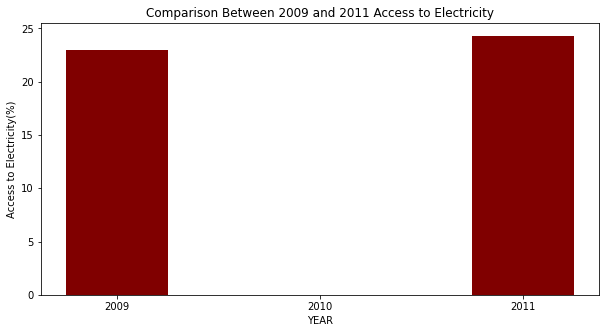

In [64]:
# Comparing overall accessibility to electricity in Kenya between 2009 and 2011
#creating variable 2009 overal country accessibility to Elec
v2009 = copy_2009.iloc[0, 2]
v2009
#variable to store/reference overall 2019 connectivity to Elec  
o19 = (Energy_2011['no_of_households_with_electricity'] + Energy_2011['no_of_households_with_solar']).sum()/(Energy_2011['households']).sum()
v2011 = round(o19*100,1)
v2011
#list to store years compared
l = [2009,2011]
#var to store both 2009 and 2011 accessibility values as list
a = [v2009,v2011]

#Plotting comparison
plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(l, a,color ='maroon',  width = 0.5) 
  
plt.xlabel("YEAR") 
plt.ylabel("Access to Electricity(%)") 
plt.title("Comparison Between 2009 and 2011 Access to Electricity") 
plt.xticks(np.arange(2009, 2012,1.0))
plt.show() 





## 2011 analysis: Compare renewable energy 2011 with World Bank



### Most Common Energy Source for Electricity across Kenyan Counties

In [65]:
copy_2011 = Energy_2011.copy(deep=True)
copy_2011.head()

,county,no_of_households_with_electricity,no_of_households_with_pressure_lamp,no_of_households_with_lantern,no_of_households_with_tin_lamp,no_of_households_with_gas_lamp,no_of_households_with_fuel_wood,no_of_households_with_solar,no_of_households_with_other,households,percent_growth_elec_2009_2011,percent_with_elec,percent_without_elec
0,Baringo,10583,437,43488,22238,796,30734,1902,471,110649,1.683428,11.283428,88.716572
1,Bomet,7552,581,113311,45434,1135,1444,4958,499,174914,2.852086,7.152086,92.847914
2,Bungoma,12219,1351,72256,180120,1704,1493,1223,458,270824,0.463371,4.963371,95.036629
3,Busia,9253,494,33283,108949,709,566,633,338,154225,0.410115,6.410115,93.589885
4,Elgeyo Marakwet,5547,220,36321,21891,449,11744,1155,228,77555,1.441609,8.641609,91.358391


In [66]:
#most common/ most prevalent energy source for electricity across Kenya
#dropping irrelevant columns and csaving into a new dataframe
mc = Energy_2011.drop(['percent_growth_elec_2009_2011','percent_with_elec','percent_without_elec'], axis=1)
#grouping by aggregating all rows
mc1 = mc.groupby([True]*len(mc)).sum() 

#showing the relevant column with the highest number
mc1.columns.max()

'no_of_households_with_tin_lamp'

In [67]:
#Getting the distribution of households in descending order of most used source for elec
mc_list = mc1.sum()
mc_list.sort_values(ascending=False)

households                             8767954
no_of_households_with_tin_lamp         3373126
no_of_households_with_lantern          2670387
no_of_households_with_electricity      1989740
no_of_households_with_fuel_wood         396062
no_of_households_with_solar             142273
no_of_households_with_gas_lamp           84375
no_of_households_with_other              59751
no_of_households_with_pressure_lamp      52240
dtype: int64

In [68]:
#in terms of % of total households(tin lamps)
round((mc1['no_of_households_with_tin_lamp'])/(mc1['households'])*100,2)

True    38.47
dtype: float64

### Type of Energy Source for Electricity Mostly relied on by individual counties

Electricity use in %

In [69]:
#Electricity highest counties by proportion
#% elec pop per county
copy_2011['percent_using_elec_source'] = round((copy_2011['no_of_households_with_electricity']/copy_2011['households'])*100,2)
copy_2011.head()

#Electricity highest counties in %
eh = copy_2011.groupby('county')['percent_using_elec_source'].sum()
eh.nlargest(3)

county
Nairobi    72.37
Mombasa    59.02
Kiambu     53.00
Name: percent_using_elec_source, dtype: float64

In [70]:
#Electricity scarce counties by proportion in %
eh.nsmallest(3)

county
Turkana       2.45
Tana River    2.50
Mandera       2.55
Name: percent_using_elec_source, dtype: float64

Pressure lamp use in %

In [71]:
#Pressure lamp use highest counties by proportion
#% pressure lamp use pop per county
copy_2011['percent_using_pressure_lamp'] = round((copy_2011['no_of_households_with_pressure_lamp']/copy_2011['households'])*100,2)
copy_2011.head()

#Pressure lamp use highest counties in %
plh = copy_2011.groupby('county')['percent_using_pressure_lamp'].sum()
plh.nlargest(3)

county
Nairobi    1.05
Mombasa    1.02
Kajiado    0.82
Name: percent_using_pressure_lamp, dtype: float64

In [72]:
#Pressure lamp least use counties by proportion in %
plh.nsmallest(3)

county
Wajir         0.11
West Pokot    0.11
Marsabit      0.12
Name: percent_using_pressure_lamp, dtype: float64

Lantern use in %

In [73]:
#Lantern use highest counties by proportion
#% lantern use pop per county
copy_2011['percent_using_lantern'] = round((copy_2011['no_of_households_with_lantern']/copy_2011['households'])*100,2)
copy_2011.head()

#Lantern use highest counties in %
lh = copy_2011.groupby('county')['percent_using_lantern'].sum()
lh.nlargest(3)

county
Bomet        64.78
Makueni      63.27
Nyandarua    55.15
Name: percent_using_lantern, dtype: float64

In [74]:
#Lantern least use counties by proportion in %
lh.nsmallest(3)

county
Turkana     8.58
Samburu    10.72
Nairobi    13.01
Name: percent_using_lantern, dtype: float64

Tin Lamp use in %

In [75]:
#Tin lamp use highest counties by proportion
#% tin lamp use pop per county
copy_2011['percent_using_tin_lamp'] = round((copy_2011['no_of_households_with_tin_lamp']/copy_2011['households'])*100,2)
copy_2011.head()

#Tin lamp use highest counties in %
tlh = copy_2011.groupby('county')['percent_using_tin_lamp'].sum()
tlh.nlargest(3)

county
Kwale       73.02
Homa Bay    72.94
Siaya       72.89
Name: percent_using_tin_lamp, dtype: float64

In [76]:
#Tin lamp least use counties by proportion in %
tlh.nsmallest(3)

county
Turkana     10.98
Marsabit    12.21
Nairobi     12.54
Name: percent_using_tin_lamp, dtype: float64

Gas Lamp use in %

In [77]:
#Gas lamp use highest counties by proportion
#% gas lamp use pop per county
copy_2011['percent_using_gas_lamp'] = round((copy_2011['no_of_households_with_gas_lamp']/copy_2011['households'])*100,2)
copy_2011.head()

#Gas lamp use highest counties in %
glh = copy_2011.groupby('county')['percent_using_gas_lamp'].sum()
glh.nlargest(3)

county
Garissa    17.52
Mandera    11.03
Wajir      11.03
Name: percent_using_gas_lamp, dtype: float64

In [78]:
#Gas lamp least use counties by proportion in %
glh.nsmallest(3)

county
Nairobi    0.13
Mombasa    0.19
Kiambu     0.30
Name: percent_using_gas_lamp, dtype: float64

Wood use in %

In [79]:
#Wood use highest counties by proportion
#% wood use pop per county
copy_2011['percent_using_fuel_wood'] = round((copy_2011['no_of_households_with_fuel_wood']/copy_2011['households'])*100,2)
copy_2011.head()

#Wood use highest counties in %
wh = copy_2011.groupby('county')['percent_using_fuel_wood'].sum()
wh.nlargest(3)

county
Turkana       72.97
Samburu       60.08
West Pokot    50.10
Name: percent_using_fuel_wood, dtype: float64

In [80]:
#Wood least use counties by proportion in %
wh.nsmallest(3)

county
Nairobi    0.06
Kiambu     0.15
Mombasa    0.20
Name: percent_using_fuel_wood, dtype: float64

Solar use in %

In [81]:
#Solar use highest counties by proportion
#% solar use pop per county
copy_2011['percent_using_solar'] = round((copy_2011['no_of_households_with_solar']/copy_2011['households'])*100,2)
copy_2011.head()

#Solar use highest counties in %
sh = copy_2011.groupby('county')['percent_using_solar'].sum()
sh.nlargest(3)

county
Tharaka Nithi    8.42
Nyandarua        6.01
Laikipia         5.94
Name: percent_using_solar, dtype: float64

In [82]:
#Solar least use counties by proportion in %
sh.nsmallest(3)

county
Nairobi    0.10
Mombasa    0.14
Wajir      0.17
Name: percent_using_solar, dtype: float64

Other sources in %

In [83]:
#Other source use highest counties by proportion
#% other source use pop per county
copy_2011['percent_using_other'] = round((copy_2011['no_of_households_with_other']/copy_2011['households'])*100,2)
copy_2011.head()

#Solar use highest counties in %
oh = copy_2011.groupby('county')['percent_using_other'].sum()
oh.nlargest(3)

county
Wajir       7.17
Garissa     6.92
Marsabit    5.06
Name: percent_using_other, dtype: float64

In [84]:
#Other source least use counties by proportion in %
oh.nsmallest(3)

county
Nyamira     0.06
Vihiga      0.10
Homa Bay    0.11
Name: percent_using_other, dtype: float64

### Comparison between renewable energy 2011 with World Bank

In [85]:
#Electricity connectivity 2011 in %
Electricity_total = (Energy_2011['no_of_households_with_electricity'].sum() + Energy_2011['no_of_households_with_solar'].sum()) / Energy_2011['households'].sum()
e2011 = round(Electricity_total * 100, 2)
e2011
#but W.B showed 29% access in 2011

e2011 == Electricity_access.iloc[21, 2:]

percent_access_to_electricity    False
Name: 21, dtype: bool

In [86]:
# Check if 2011 solar adds up to 0.305242% as reported by World Bank
Solar = Energy_2011['no_of_households_with_solar'].sum() / (Energy_2011['no_of_households_with_electricity'].sum() + Energy_2011['no_of_households_with_solar'].sum())
Solar_percentage = Solar * 100
round(Solar_percentage,2)
#Source.loc[Source.year == 2011, 'solar_percent_of_electricity'] / Solar_percentage
# Value shows that the World Bank solar percentage is lower than the 2011 dataset from Open Data.

6.67

In [87]:
# Check if 2011 electricity percentage matches hydro as reported by World Bank
Electricity = Energy_2011['no_of_households_with_electricity'].sum() / (Energy_2011['no_of_households_with_electricity'].sum() + Energy_2011['no_of_households_with_solar'].sum())
Elec_percentage = round(Electricity * 100,2)
Elec_percentage
# Source.loc[Source.year == 2011, ''] / Solar_percentage

93.33

## WORLD BANK DATASETS

### Compare general stats for Kenya (2009 & 2011) with World Bank datasets for Validity



In [88]:
#sum 2009,11 and compare WB corresponding years. Bar chart(09/11)

### Observe share of the population with access to electricity over the years (trend)


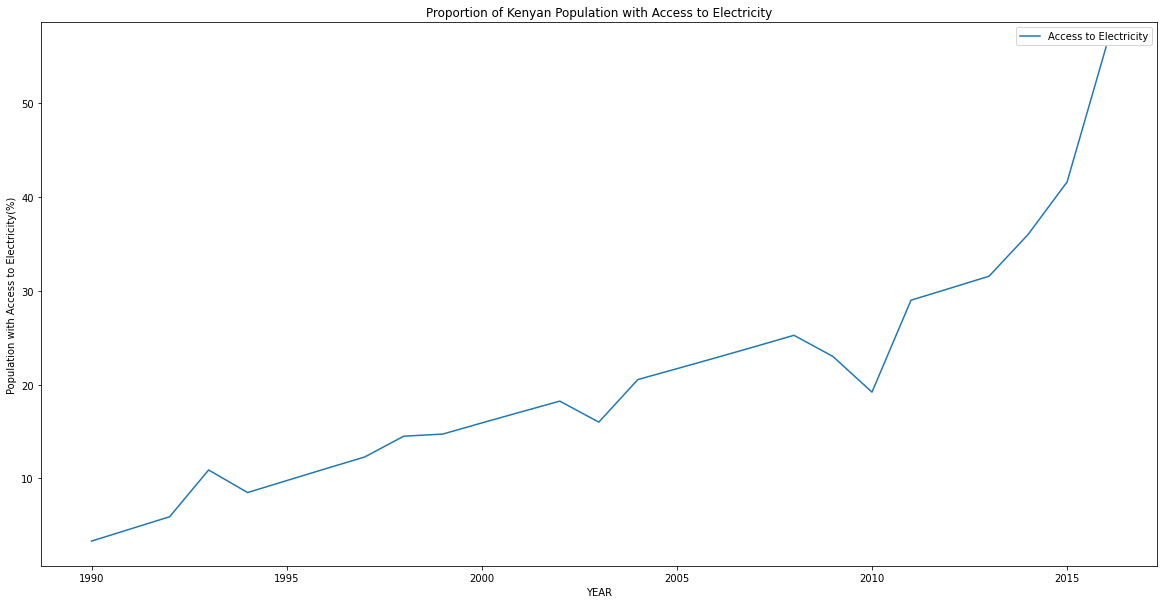

In [89]:
#population with electricity over the years
Electricity_access.head()

Electricity_access.plot(x='year', y='percent_access_to_electricity',figsize= (20,10), label ='Access to Electricity')
plt.title('Proportion of Kenyan Population with Access to Electricity')
plt.xlabel('YEAR')
plt.ylabel('Population with Access to Electricity(%)')
plt.show()

##possible recommendations: try and explain reason for dips using secondary sources of data


### Observe share of electricity by source over the years (trend)

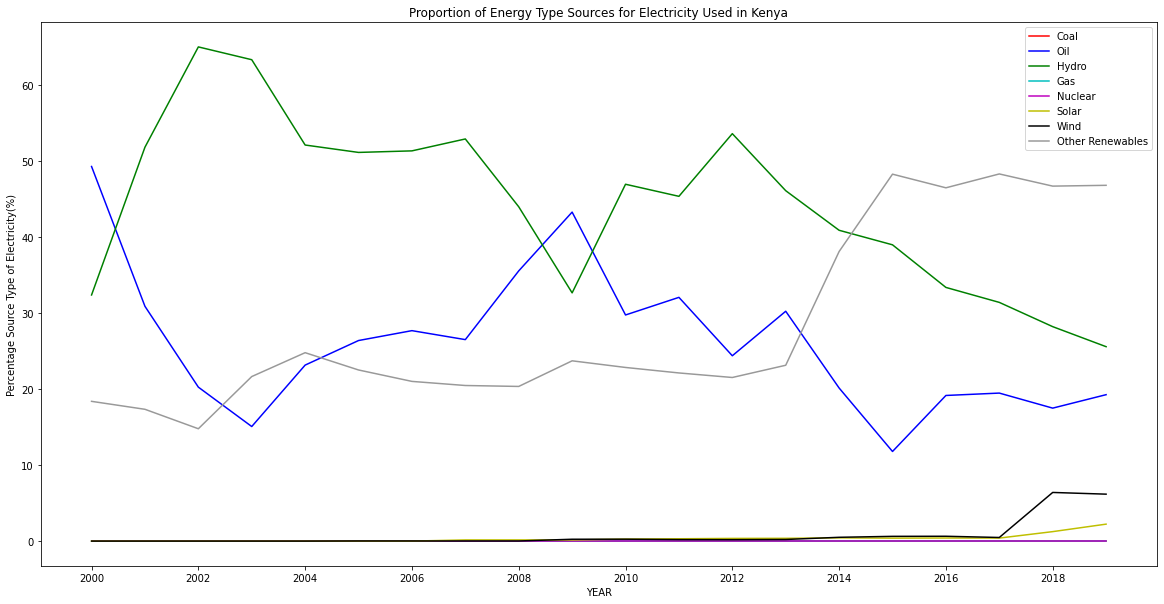

In [90]:
#share of electricity by source over the years
Source.head()

#defining what to plot and how to do it
plt.figure(figsize= (20,10))
plt.plot(Source['year'], Source['coal_percent_of_electricity'],'r', label='Coal')
plt.plot(Source['year'], Source['oil_percent_of_electricity'], 'b', label='Oil')
plt.plot(Source['year'], Source['hydro_percent_of_electricity'], 'g', label='Hydro')
plt.plot(Source['year'], Source['gas_percent_of_electricity'], 'c', label= 'Gas')
plt.plot(Source['year'], Source['nuclear_percent_of_electricity'], 'm', label='Nuclear')
plt.plot(Source['year'], Source['solar_percent_of_electricity'], 'y', label='Solar')
plt.plot(Source['year'], Source['wind_percent_of_electricity'], 'k', label='Wind')
plt.plot(Source['year'], Source['other_renewables_percent_of_electricity'], '0.6', label='Other Renewables')


#plotting all the types onto the same plot for comparison
plt.title('Proportion of Energy Type Sources for Electricity Used in Kenya')
plt.xlabel('YEAR')
plt.ylabel('Percentage Source Type of Electricity(%)')
plt.xticks(np.arange(min(Source['year']), max(Source['year']), 2.0))
plt.legend()
plt.show()



### Observe share of electricity with fossil fuels over the years (trend)

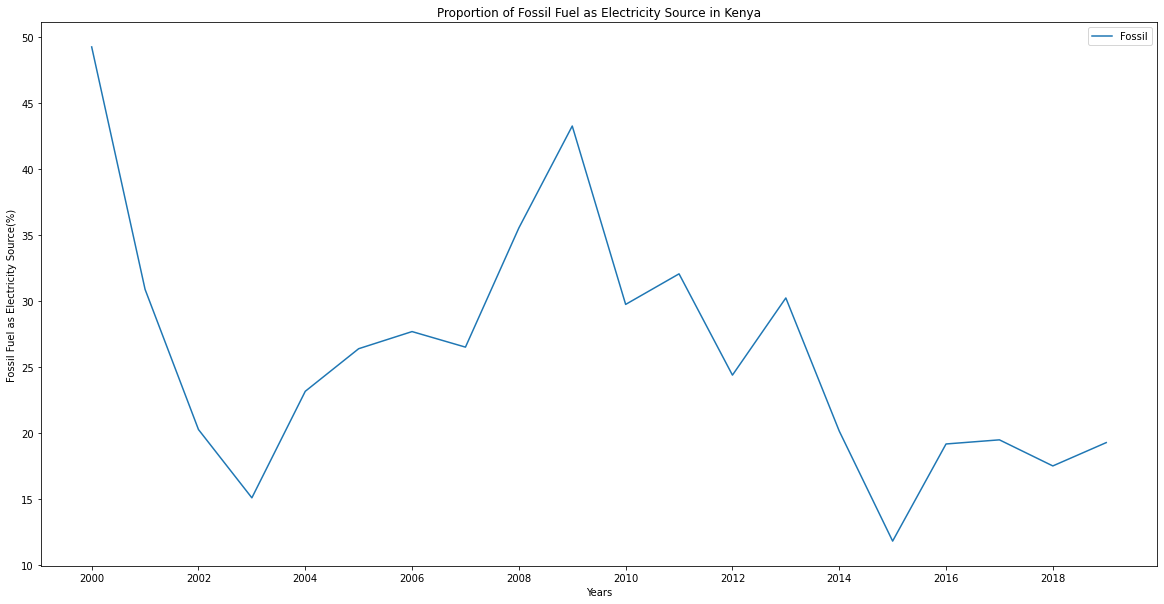

In [91]:
#Fossil fuel usage will be the sum of all carbon sourced energy forms
#creating a column to reflect that
#Nuclear energy was not included as a fossil fuel
Source['fossil_percent_of_electricity'] = Source['coal_percent_of_electricity'] + Source['oil_percent_of_electricity'] + Source['gas_percent_of_electricity']
Source.head()

#plotting the share of fossil fuel over the years
Source.plot(x='year', y='fossil_percent_of_electricity',figsize= (20,10), label= 'Fossil')
plt.title('Proportion of Fossil Fuel as Electricity Source in Kenya')
plt.xlabel('Years')
plt.ylabel('Fossil Fuel as Electricity Source(%)')
plt.xticks(np.arange(min(Source['year']), max(Source['year']), 2.0))
plt.show()


### Observe trend of carbon emissions over the years


In [92]:
#The trend of Carbon Emissions can be tracked by the trend of the use of fossil fuel as shown above/previous cell.

### Observe share of electricity with renewable energy over the years (trend)


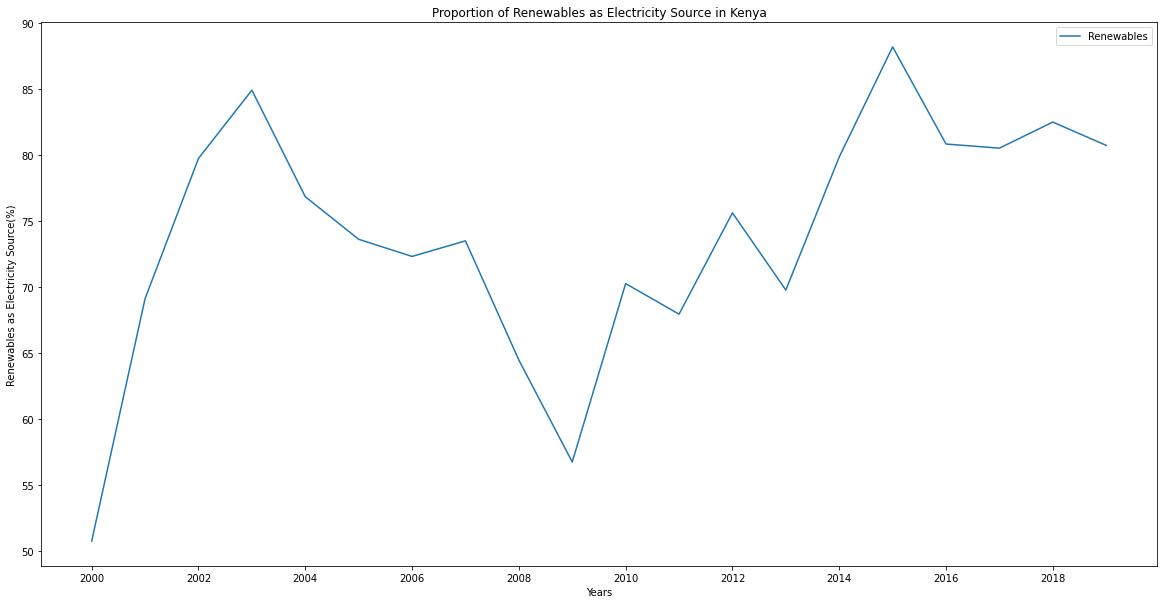

In [93]:
#Renewables usage
#plotting the share of renewables over the years
Source.plot(x='year', y='percent_total_renewables',figsize= (20,10), label = 'Renewables')
plt.title('Proportion of Renewables as Electricity Source in Kenya')
plt.xlabel('Years')
plt.ylabel('Renewables as Electricity Source(%)')
plt.xticks(np.arange(min(Source['year']), max(Source['year']), 2.0))
plt.show()


### Comparison of electricity with renewable vs fossil fuel

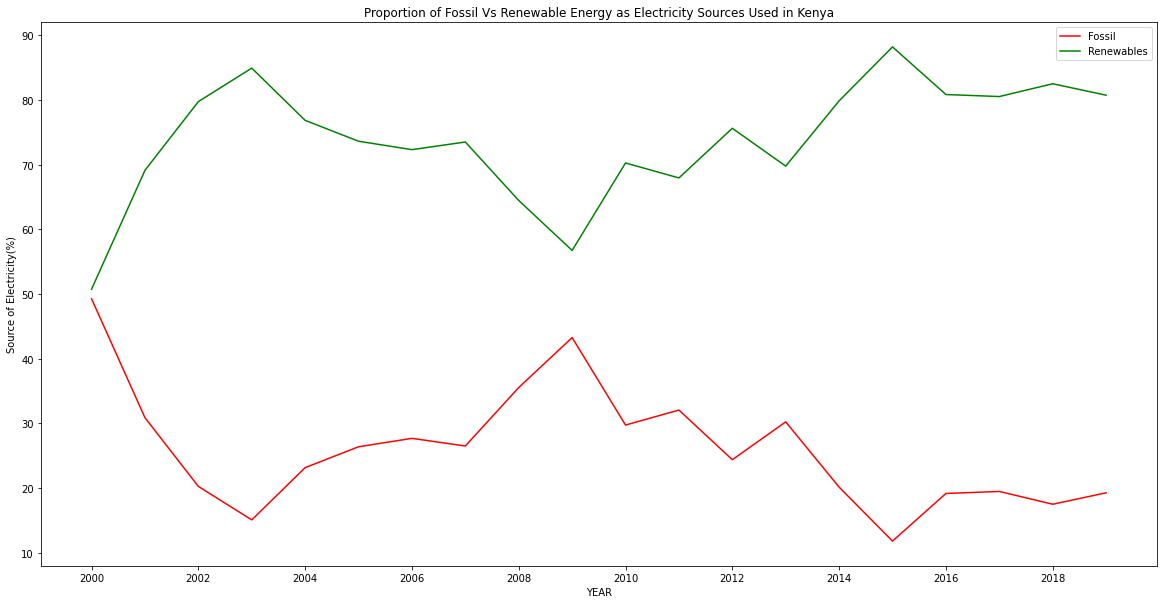

In [94]:
#plotting both together to view the trends simultaneously over the years
#defining what to plot and how to do it
plt.figure(figsize= (20,10))
plt.plot(Source['year'], Source['fossil_percent_of_electricity'],'r', label='Fossil')
plt.plot(Source['year'], Source['percent_total_renewables'], 'g', label='Renewables')


#plotting both types onto the same plot for comparison
plt.title('Proportion of Fossil Vs Renewable Energy as Electricity Sources Used in Kenya')
plt.xlabel('YEAR')
plt.ylabel('Source of Electricity(%)')
plt.xticks(np.arange(min(Source['year']), max(Source['year']), 2.0))
plt.legend()
plt.show()


### Is the country in line with 30% reduction of fossil fuel from 2015?

In [95]:
#2019 - 2015 fossil fuel, is it == to 30%?

### Is the country in line to achieve 80% renewable energy as the primary energy source?(2020)

In [96]:
#check renewable % by 2019, then forecast to 2020?

### Is the country in line to achieve 100% renewable energy as the primary energy source?(2022)

In [97]:
#renewable plot up to 2019 average that over the remaining year for 2020 and 2022???